## London Air Quality data Outlier removal

The dataset consists of the hourly mean of Nitric Oxide concentration for the site (CR5-Croydon-Norbury in London). The data collected is of 5 years from 2013 to 2018.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Croydon-Norbury Air Quality.csv')
df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CR5,NO,01/01/2013 00:00,24.6,ug m-3,R
1,CR5,NO,01/01/2013 01:00,17.9,ug m-3,R
2,CR5,NO,01/01/2013 02:00,20.0,ug m-3,R
3,CR5,NO,01/01/2013 03:00,24.5,ug m-3,R
4,CR5,NO,01/01/2013 04:00,7.4,ug m-3,R


In [3]:
df.shape

(52060, 6)

In [4]:
df.columns.values

array(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'], dtype=object)

In [5]:
df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [6]:
df=df[~pd.isnull(df['Value'])] # Removed records with null values

In [7]:
df['Value'].count() # Counting the number of rows

44428

In [8]:
df[df['Provisional or Ratified']=='P'].head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
44496,CR5,NO,29/01/2018 00:00,3.4,ug m-3,P
44497,CR5,NO,29/01/2018 01:00,2.8,ug m-3,P
44498,CR5,NO,29/01/2018 02:00,1.4,ug m-3,P
44499,CR5,NO,29/01/2018 03:00,1.6,ug m-3,P
44500,CR5,NO,29/01/2018 04:00,1.4,ug m-3,P


Text(0.5,1,'Distribution of Nitric Oxide Concentration')

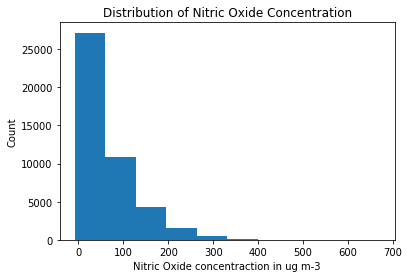

In [9]:
# Histogram Plot

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['Value'], bins=10)
plt.xlabel('Nitric Oxide concentraction in ug m-3')
plt.ylabel('Count')
plt.title('Distribution of Nitric Oxide Concentration')

In [10]:
df['Value'].describe() # Descriptive statistics of Nitric Oxide Concentration

count    44428.000000
mean        64.074232
std         64.862415
min         -7.900000
25%         16.800000
50%         41.200000
75%         92.200000
max        670.000000
Name: Value, dtype: float64

The above histogram shows that most of the time the nitric oxide values fluctuate between 0 and 200. But the values range upto 670 as per the descriptive statistcs and this is probably because of outliers existing in the data.

Text(0.5,1,'Density Plot of Nitric Oxide Concentration')

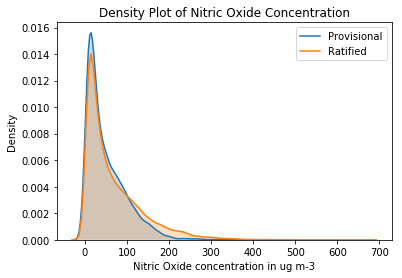

In [11]:
# Density Plot
import seaborn as sns
# Make one plot for each different location
sns.kdeplot(df[df['Provisional or Ratified']=='P']['Value'],label='Provisional', shade = True)
sns.kdeplot(df[df['Provisional or Ratified']=='R']['Value'],label='Ratified', shade = True)
# Add labeling
plt.xlabel('Nitric Oxide concentration in ug m-3')
plt.ylabel('Density')
plt.title('Density Plot of Nitric Oxide Concentration')

In [12]:
df[df['Provisional or Ratified']=='R']['Value'].describe()

count    36889.000000
mean        66.862384
std         67.674987
min         -7.900000
25%         17.200000
50%         42.700000
75%         96.800000
max        670.000000
Name: Value, dtype: float64

In [13]:
df[df['Provisional or Ratified']=='P']['Value'].describe()

count    7539.000000
mean       50.431556
std        46.468341
min        -3.000000
25%        14.700000
50%        34.600000
75%        75.200000
max       357.299990
Name: Value, dtype: float64

From the above Density Plot we can see that the distribution of concentration of nitric oxide in Provisional and Ratified is similar.

Text(0.5,1,'Scatter plot of Nitric Oxide Distribution')

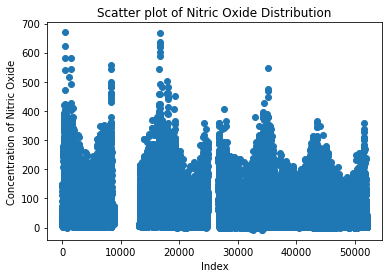

In [14]:
plt.scatter(df.index,df['Value'])
plt.xlabel('Index')
plt.ylabel('Concentration of Nitric Oxide')
plt.title('Scatter plot of Nitric Oxide Distribution')

From the above scatter plot we can confirm that outliers are present in the data and they have to be removed.

In [15]:
df[df['Value']>350]['Value'].count()

144

In [16]:
df[df['Value']>280]['Value'].count()

528

In [17]:
df['ReadingDateTime']=pd.to_datetime(df['ReadingDateTime'])

In [18]:
df['ReadingDateTime'].dt.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

### Identifying outliers using Inter Quartile Range

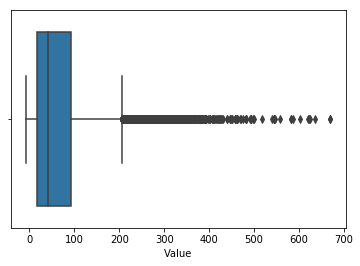

In [19]:
sns.boxplot(x=df['Value'])

The above box plot shows the points in the interquartile range (IQR) in the box and the points outside the range. We will consider the points more than Q3(third quartile - 75%) plus 1.5*(IQR) i.e., Q3 + 1.5*(IQR) or the points less than  Q1(first quartile - 25%) minus 1.5*(IQR) i.e., Q1 - 1.5*(IQR) as outliers. Below code is for identifying outliers.

In [20]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

75.4


In [21]:
# Prints the outlier values

threshold_1 = Q1 - (1.5 * IQR)
threshold_2 = Q3 + (1.5 * IQR)

df_outliers=df[~((df['Value']>=threshold_1) & (df['Value']<=threshold_2))]
df_non_outliers=df[(df['Value']>=threshold_1) & (df['Value']<=threshold_2)]
df_outliers.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
198,CR5,NO,2013-09-01 06:00:00,206.20000,ug m-3,R
199,CR5,NO,2013-09-01 07:00:00,281.50000,ug m-3,R
200,CR5,NO,2013-09-01 08:00:00,261.00000,ug m-3,R
201,CR5,NO,2013-09-01 09:00:00,230.10001,ug m-3,R
202,CR5,NO,2013-09-01 10:00:00,240.60001,ug m-3,R


In [22]:
df_non_outliers['Value'].describe()

count    42530.000000
mean        55.157150
std         48.694485
min         -7.900000
25%         16.100000
50%         38.200000
75%         83.800000
max        205.300000
Name: Value, dtype: float64

### Identifying outliers using Z-Score

Z-Score is a measure of how many standard deviations above or below the mean a data point is. As per the normal distribution 99.7% of the values are within three standard deviations from the mean. Hence, we'll consider all the points below three standard deviations from mean i.e., with a z-score of less than -3 and the points above three standard deviations from mean i.e., with a z-score of more than +3  as outliers. 

Please find the code below:

In [23]:
from scipy import stats
df_dup=df.copy()
df_dup['z_score'] = abs(stats.zscore(df['Value'])) #Caluculating z-score
df_dup.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,z_score
0,CR5,NO,2013-01-01 00:00:00,24.6,ug m-3,R,0.608591
1,CR5,NO,2013-01-01 01:00:00,17.9,ug m-3,R,0.711888
2,CR5,NO,2013-01-01 02:00:00,20.0,ug m-3,R,0.679511
3,CR5,NO,2013-01-01 03:00:00,24.5,ug m-3,R,0.610133
4,CR5,NO,2013-01-01 04:00:00,7.4,ug m-3,R,0.873771


In [24]:
threshold_1=-3
threshold_2=3
df_outliers=df_dup[df_dup['z_score']>threshold_2]
df_non_outliers=df_dup[df_dup['z_score']<=threshold_2]
df_outliers
#df_dup['z_score'].describe()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,z_score
199,CR5,NO,2013-09-01 07:00:00,281.50000,ug m-3,R,3.352145
200,CR5,NO,2013-09-01 08:00:00,261.00000,ug m-3,R,3.036088
204,CR5,NO,2013-09-01 12:00:00,263.39999,ug m-3,R,3.073089
205,CR5,NO,2013-09-01 13:00:00,273.29999,ug m-3,R,3.225722
209,CR5,NO,2013-09-01 17:00:00,262.60001,ug m-3,R,3.060756
211,CR5,NO,2013-09-01 19:00:00,279.60001,ug m-3,R,3.322852
212,CR5,NO,2013-09-01 20:00:00,289.39999,ug m-3,R,3.473942
213,CR5,NO,2013-09-01 21:00:00,335.89999,ug m-3,R,4.190853
214,CR5,NO,2013-09-01 22:00:00,314.00000,ug m-3,R,3.853211
215,CR5,NO,2013-09-01 23:00:00,328.79999,ug m-3,R,4.081389


In [25]:
df_non_outliers['Value'].describe()

count    43676.000000
mean        59.702127
std         55.507928
min         -7.900000
25%         16.500000
50%         40.000000
75%         88.900000
max        258.600010
Name: Value, dtype: float64